<a href="https://colab.research.google.com/github/vKrish14/Complete-Python-Bootcamp/blob/main/Data_Visualization_using_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Data Visualization using Matplotlib**
---
### Data Visualization
1. Graphical representation of information and data
2. Graph, Chart, and Map make it easier to understand the patterns in data
3. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
4. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

##### Self Learning Resource
1. Matplotlib: <a href="https://matplotlib.org/stable/gallery/index.html"> Examples</a>
2. Seaborn: <a href="https://seaborn.pydata.org/examples/index.html"> Examples</a>
3. Data visualization using matplotlib, seaborn, plotly - <a href="https://www.kaggle.com/abhishekvaid19968/data-visualization-using-matplotlib-seaborn-plotly"> Click Here </a>


---
# **Import matplolib**
---

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

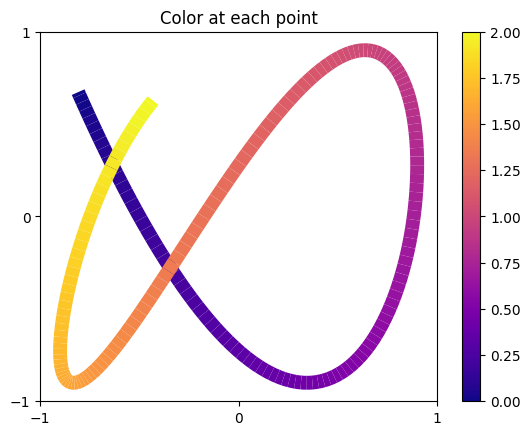

In [43]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import LineCollection


def colored_line(x, y, c, ax, **lc_kwargs):
    """
    Plot a line with a color specified along the line by a third value.

    It does this by creating a collection of line segments. Each line segment is
    made up of two straight lines each connecting the current (x, y) point to the
    midpoints of the lines connecting the current point with its two neighbors.
    This creates a smooth line with no gaps between the line segments.

    Parameters
    ----------
    x, y : array-like
        The horizontal and vertical coordinates of the data points.
    c : array-like
        The color values, which should be the same size as x and y.
    ax : Axes
        Axis object on which to plot the colored line.
    **lc_kwargs
        Any additional arguments to pass to matplotlib.collections.LineCollection
        constructor. This should not include the array keyword argument because
        that is set to the color argument. If provided, it will be overridden.

    Returns
    -------
    matplotlib.collections.LineCollection
        The generated line collection representing the colored line.
    """
    if "array" in lc_kwargs:
        warnings.warn('The provided "array" keyword argument will be overridden')

    # Default the capstyle to butt so that the line segments smoothly line up
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # Compute the midpoints of the line segments. Include the first and last points
    # twice so we don't need any special syntax later to handle them.
    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    # Determine the start, middle, and end coordinate pair of each line segment.
    # Use the reshape to add an extra dimension so each pair of points is in its
    # own list. Then concatenate them to create:
    # [
    #   [(x1_start, y1_start), (x1_mid, y1_mid), (x1_end, y1_end)],
    #   [(x2_start, y2_start), (x2_mid, y2_mid), (x2_end, y2_end)],
    #   ...
    # ]
    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    lc = LineCollection(segments, **default_kwargs)
    lc.set_array(c)  # set the colors of each segment

    return ax.add_collection(lc)


# -------------- Create and show plot --------------
# Some arbitrary function that gives x, y, and color values
t = np.linspace(-7.4, -0.5, 200)
x = 0.9 * np.sin(t)
y = 0.9 * np.cos(1.6 * t)
color = np.linspace(0, 2, t.size)

# Create a figure and plot the line on it
fig1, ax1 = plt.subplots()
lines = colored_line(x, y, color, ax1, linewidth=10, cmap="plasma")
fig1.colorbar(lines)  # add a color legend

# Set the axis limits and tick positions
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_xticks((-1, 0, 1))
ax1.set_yticks((-1, 0, 1))
ax1.set_title("Color at each point")

plt.show()



<Axes: >

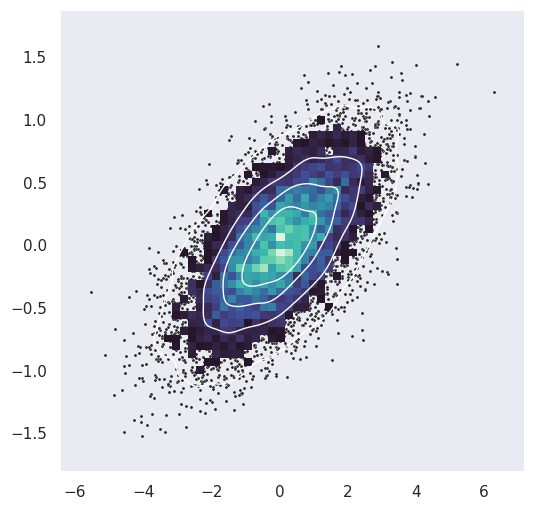

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

---
# **1. Line plot**
---
A line chart graphically displays data that changes continuously over time. Each line graph consists of points that connect data to show a **trend** (continuous change).

- When you want to make predictions based on a data history over time.

### **1.1 Plot a line**

<Axes: >

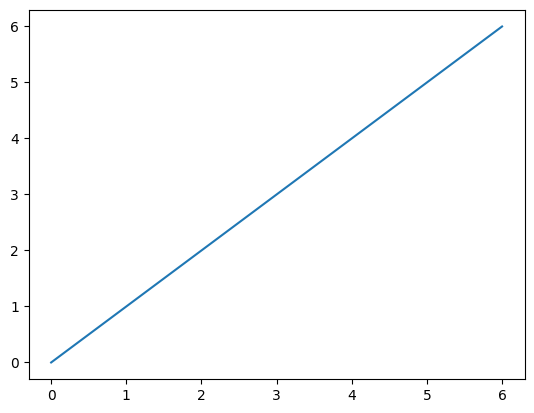

In [3]:
a = [0, 1, 2, 3, 4, 5, 6]
b = [0, 1, 2, 3, 4, 5, 6]
sns.lineplot(x=a,y=b)



---
### **1.2 To save plot in a file**
---

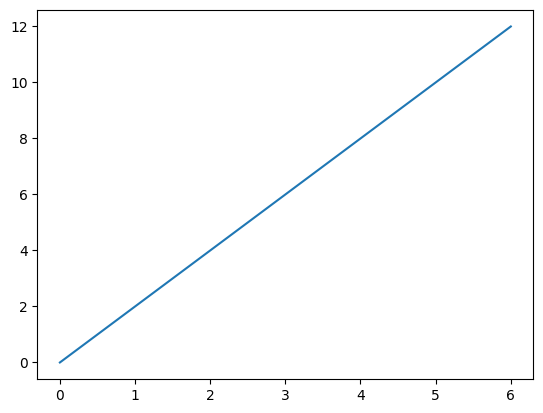

In [4]:
a = [0, 1, 2, 3, 4, 5, 6]
b = [i*2 for i in a ]

pic = sns.lineplot(x=a,y=b)
pic.figure.savefig("testImage.png",dpi=100)
#plt.savefig("testImage.jpg", dpi=300)


---
### **1.3 Download image to local**
---

In [5]:
from google.colab import files
files.download('testImage.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **1.4 Plot a line with details**
---

Text(0.5, 0, 'X axis')

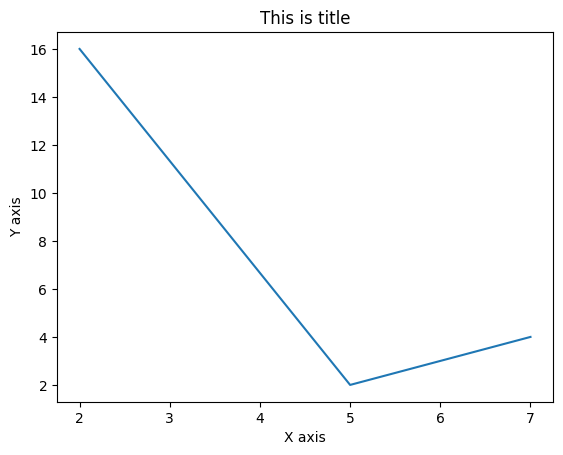

In [6]:
a = [5, 2, 7]
b = [2, 16, 4]

figs = sns.lineplot(x=a,y=b)

figs.set_title('This is title')
figs.set_ylabel('Y axis')
figs.set_xlabel('X axis')


---
### **1.5 Plot multiple lines**
---

Text(0.5, 1.0, 'Bike details in lineplot')

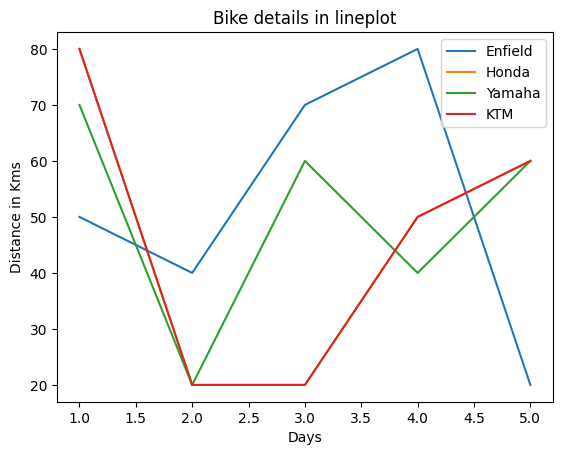

In [7]:
x  = [1, 2, 3, 4, 5]
y1 = [50, 40, 70, 80, 20]
y2 = [80, 20, 20, 50, 60]
y3 = [70, 20, 60, 40, 60]
y4 = [80, 20, 20, 50, 60]
pic = sns.lineplot(x=x,y=y1,label='Enfield')
sns.lineplot(x=x,y=y2,label='Honda')
sns.lineplot(x=x,y=y3,label='Yamaha')
sns.lineplot(x=x,y=y4,label='KTM')
pic.set_xlabel('Days')
pic.set_ylabel('Distance in Kms')
pic.set_title('Bike details in lineplot')

---
### **1.6 Mini Project-3 Plot** (Time taken to convert text file to upper case)
---

Text(0.5, 1.0, 'Performance of different programming languages')

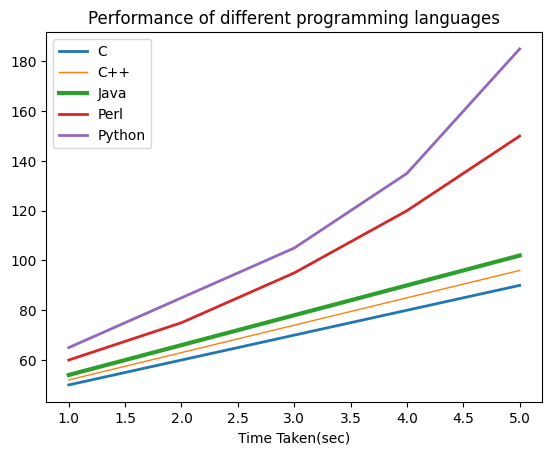

In [8]:
x  = [1, 2, 3, 4, 5]
y1 = [50, 60, 70, 80, 90]
y2 = [52, 63, 74, 85, 96]
y3 = [54, 66, 78, 90, 102]
y4 = [60, 75, 95, 120, 150]
y5 = [65, 85, 105, 135, 185]
pics = sns.lineplot(x = x, y = y1, label='C', linewidth=2)
sns.lineplot(x = x, y = y2, label='C++', linewidth=1)
sns.lineplot(x = x, y = y3, label='Java', linewidth=3)
sns.lineplot(x = x, y = y4, label='Perl', linewidth=2)
sns.lineplot(x = x, y = y5, label='Python', linewidth=2)
pics.set_xlabel('File size(GB)')
pics.set_xlabel('Time Taken(sec)')
pics.set_title('Performance of different programming languages')

---
# **2. Bar plot**
---
Bar plots are commonly used to compare several categories of data.
Each rectangular bar has length and height proportional to the values that they represent.
- To compare data among different categories.
- Bar charts are ideal for visualizing the distribution of data when we have more than three categories.


### **2.1 Plot a bar chart**

<Axes: >

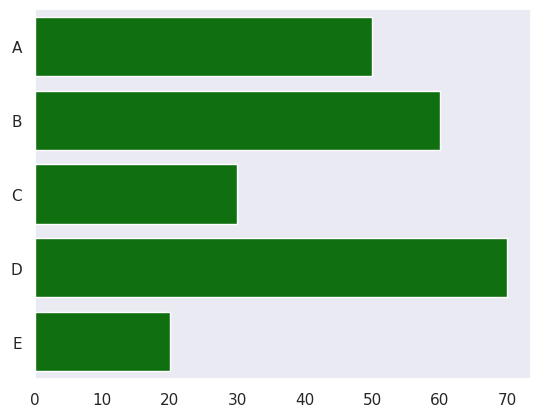

In [47]:
x = ["A", "B", "C", "D", "E"]
y = [50, 60, 30, 70, 20]
sns.barplot(x =y, y = x, color = "green")

---
### **2.2 Plot a bar chart with details**
---

Text(0.5, 1.0, 'Student Performance in EST')

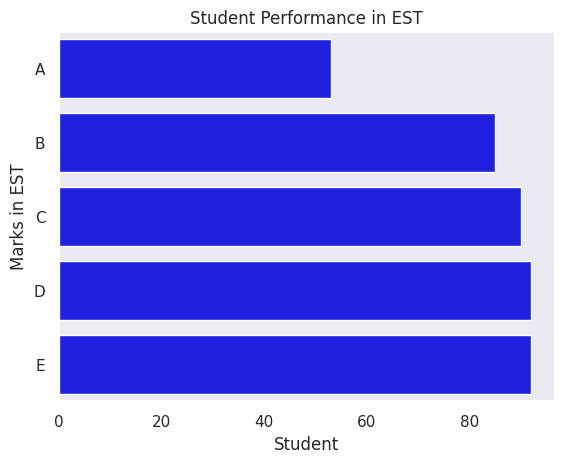

In [48]:
import random as r

y = [ r.randint(35,95) for i in range(5)]
x = ["A", "B", "C", "D", "E"]

pp = sns.barplot(x=y,y=x, color = "blue")
pp.set_ylabel('Marks in EST')
pp.set_xlabel('Student')
pp.set_title('Student Performance in EST')

---
### **2.3 Multiple bar plot - Example - 1**
---

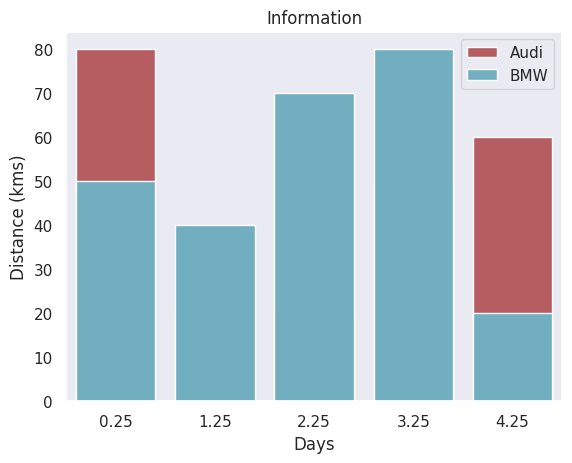

In [51]:
x1 = [0.25, 1.25, 2.25, 3.25, 4.25]
y1 = [50, 40, 70, 80, 20]
y2 = [80, 20, 20, 50, 60]
sns.barplot(x=x1, y=y2, label="Audi", color='r')
fig0 = sns.barplot(x=x1, y=y1, label="BMW", color='c')
fig0.set_xlabel('Days')
fig0.set_ylabel('Distance (kms)')
fig0.set_title('Information')
plt.legend()


---
### **2.4 Horizontal Bar Plot (barh)**
---

<Axes: >

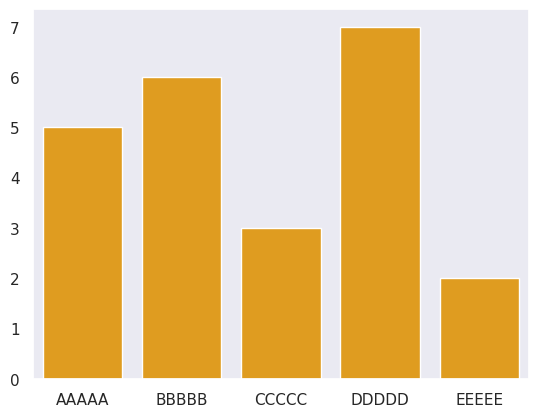

In [55]:
x = [5, 6, 3, 7, 2]
y = ["AAAAA", "BBBBB", "CCCCC", "DDDDD", "EEEEE"]

sns.barplot(x = y, y = x, color ="orange",orient = 'v')

---
# **3. Scatter plot**
---
The scatter plot is an X-Y diagram that shows a relationship between two variables.

The purpose is to show how much one variable affects another.
- When trying to find out whether there is a relationship between 2 variables.
- To predict the behavior of dependent variable based on the measure of the independent variable


### **3.1 Simple Scatter plot**

<Axes: >

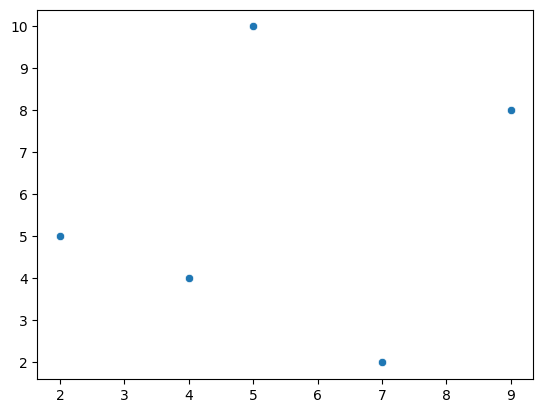

In [13]:
x = [5, 2, 9, 4, 7]     # x-axis values
y = [10, 5, 8, 4, 2]    # Y-axis values

sns.scatterplot(x = x, y = y)       # Function to plot scatter


---
### **3.2 Scatter plot with detail**
---

Text(0.5, 1.0, 'Age Vs Salary')

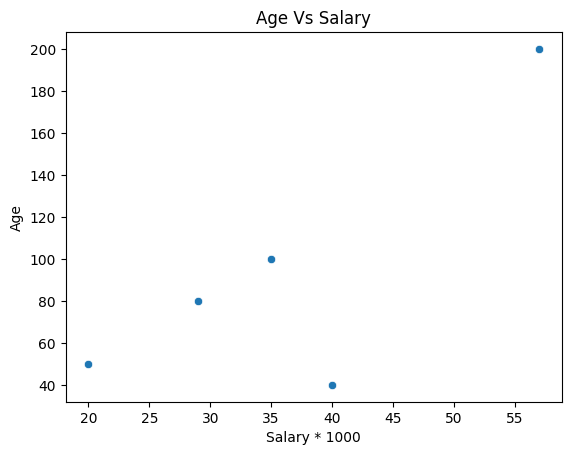

In [14]:
x = [35, 20, 29, 40, 57]     		# x-axis values
y = [100, 50, 80, 40, 200]      # Y-axis values

scat = sns.scatterplot(x = x,y = y)         			# Function to plot scatter

scat.set_xlabel('Salary * 1000')
scat.set_ylabel('Age')
scat.set_title('Age Vs Salary')


---
### **3.3 Multiple scatter plot**
---

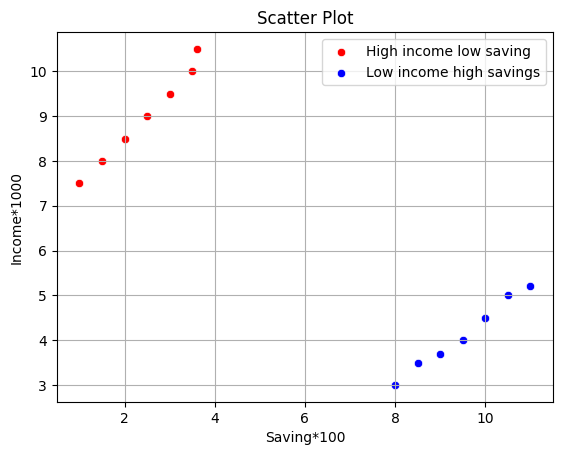

In [15]:
x1 = [1, 1.5, 2, 2.5, 3, 3.5, 3.6]
y1 = [7.5, 8, 8.5, 9, 9.5, 10, 10.5]

x2 = [8, 8.5, 9, 9.5, 10, 10.5, 11]
y2 = [3, 3.5, 3.7, 4, 4.5, 5, 5.2]

scat1 = sns.scatterplot(x = x1,y = y1, label='High income low saving',  color='r')
sns.scatterplot(x = x2, y = y2, label='Low income high savings', color='b')

scat1.set_xlabel('Saving*100')
scat1.set_ylabel('Income*1000')
scat1.set_title('Scatter Plot')

plt.grid()

---
# **4. Pie plot**
---
It displays data and statistics in an easy-to-understand ‘pie-slice’ format and illustrates numerical proportion.
- When you want to create and represent the composition of something.
- To show percentage or proportional data.
- Pie charts work best for displaying data for 3 to 7 categories.

### **4.1 Simple Pie plot**

460


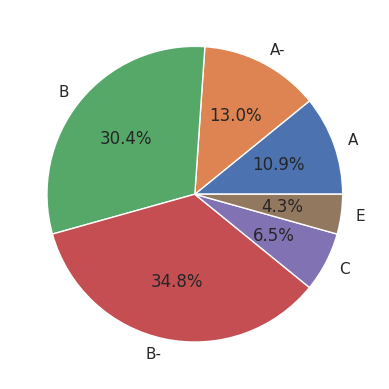

In [58]:
grades = 'A', 'A-', 'B', 'B-', 'C', 'E'
gradeCount = [50, 60, 140, 160, 30, 20]
print(sum(gradeCount))
plt.pie(gradeCount, labels=grades, autopct='%1.1f%%')

plt.show()
# Question: What is the output?
# print(type(grades))

Quick Question: What does autopct do here ?

---
### **4.2 Pie plot - Explode - 1**
---

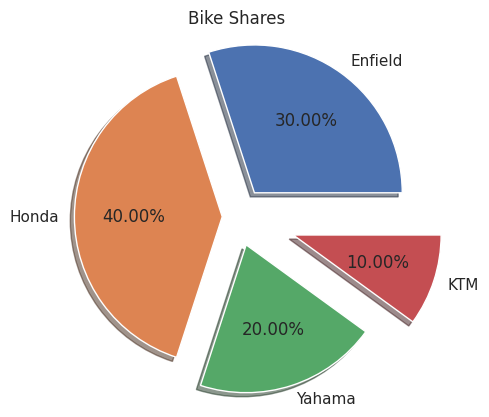

In [68]:
share = [3,4,2,1]
bikes = ['Enfield','Honda','Yahama','KTM']

plt.pie(share, labels=bikes, shadow= True, explode=(0.2,0.1,0.2,0.4),
        autopct='%.2f%%')

plt.title('Bike Shares')
plt.show()

Try changing values of explode

---
# **5 Working with user Dataset**

---
### **5.1 Download NBA Dataset**

<a href="https://drive.google.com/file/d/1L7rgbbV4I10J28eRWq0oUMNVoDMSaYwo/view?usp=sharing">Click Here</a> to download NBA Dataset





---
### **5.2 Upload "user file" to "content" directory of Google Colab**
---

- Step 1: On Left Side, click on Directory icon
- Step 2: Click on Content
- Step 3: Click on Three Dots and upload

---
### **5.3 Read NBA Dataset**
---


In [69]:
import pandas as pd
df = pd.read_csv('/content/nbaDataset.csv')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


---
### **5.4 Read sample data of Google Colab**
---
- Content --> sample_data --> Right Click on File --> Copy path


In [19]:
import pandas as pd

df1 = pd.read_csv('/content/sample_data/california_housing_test.csv')
df1.head()
#df1.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


---
### **5.5 Read data file from Google Drive**
---
- Click on "Mount Drive" icon

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/nbaDataset.csv')
# df = pd.read_csv('/content/drive/MyDrive/nbaDataset/nbaDataset.csv')
df.head(458)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


<ipython-input-73-3014758011>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Number', y='Position', inner='stick', palette='Dark2')


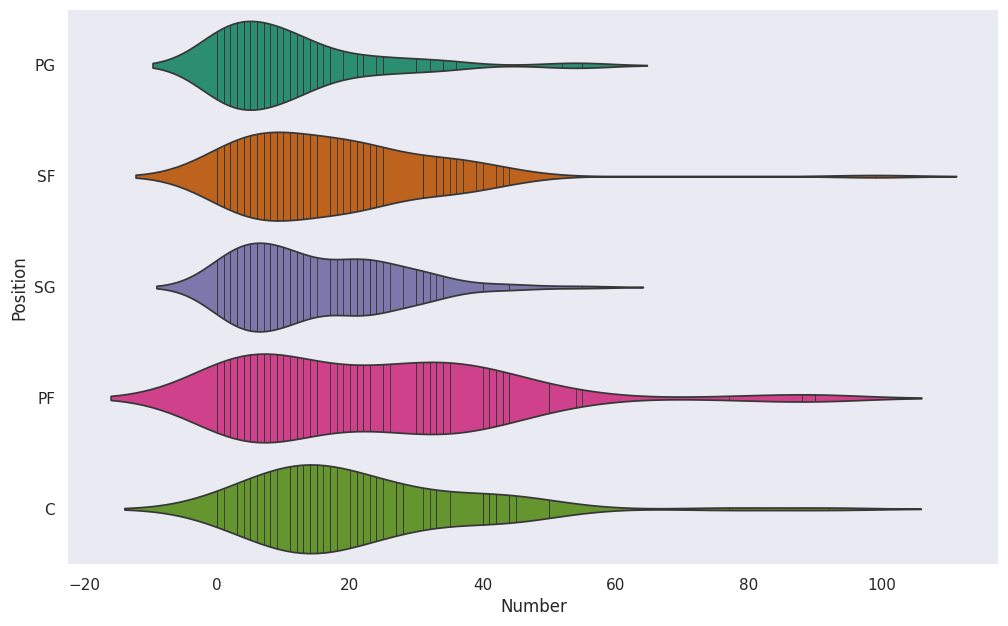

In [73]:
# @title Position vs Number

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Position'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Number', y='Position', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

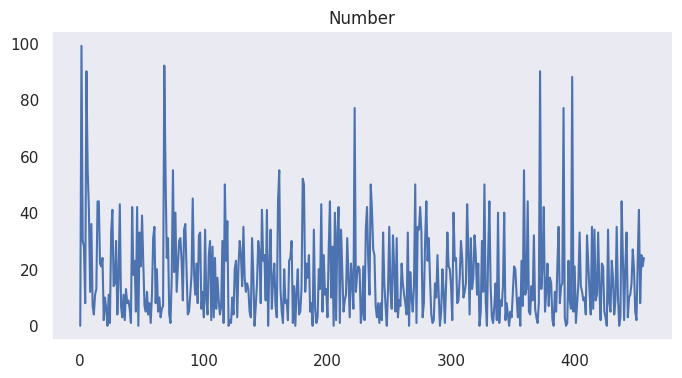

In [72]:
# @title Number

from matplotlib import pyplot as plt
df['Number'].plot(kind='line', figsize=(8, 4), title='Number')
plt.gca().spines[['top', 'right']].set_visible(False)

---
### **5.6 Bar graph**
---

Text(0.5, 1.0, 'Salary Vs Age')

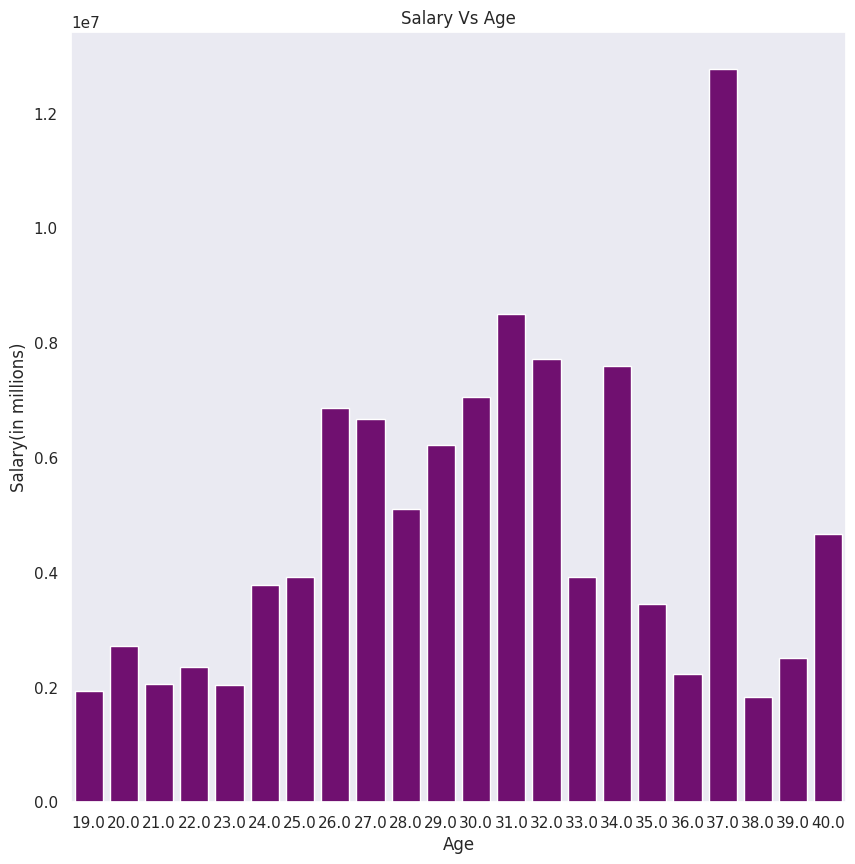

In [77]:
x = df['Age']
y = df['Salary']
plt.figure(figsize=(10,10))
fig = sns.barplot(x = x, y = y, color = "purple", errorbar=None)
fig.set_xlabel('Age')
fig.set_ylabel('Salary(in millions)')
fig.set_title('Salary Vs Age')

---
### **5.7 Horizontal bar graph**
---

Text(0.5, 1.0, 'Salary Vs Age')

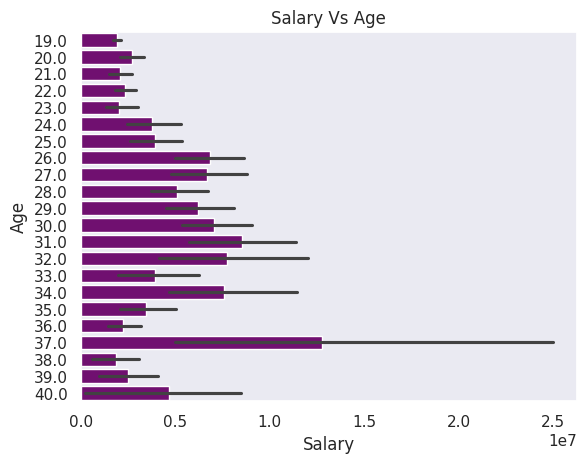

In [84]:
x = df['Age']
y = df['Salary']

fig2 = sns.barplot(x = y, y = x ,color = "purple",orient = 'h')
fig2.set_xlabel('Salary')
fig2.set_ylabel('Age')
fig2.set_title('Salary Vs Age')


Q: What does error bar represent ?

---
### **5.8 Scatter plot**
---

Text(0.5, 1.0, 'Salary Vs Age')

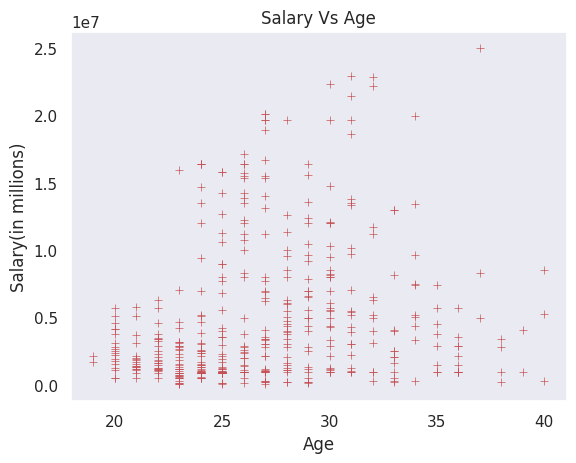

In [81]:
x = df['Age']
y = df['Salary']

fig3 = sns.scatterplot(x = x,y = y, marker = "+", color ='r')

fig3.set_xlabel('Age')
fig3.set_ylabel('Salary(in millions)')
fig3.set_title('Salary Vs Age')
# marker {'o','+','x','^','*','_'}

---
# **6 Plotting Mathematical Functions**
---
### **6.1 Plot sine curve**

Text(0.5, 1.0, 'sin(pi) wave form')

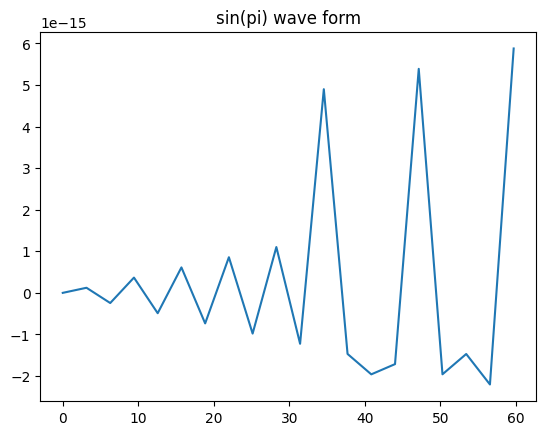

In [24]:
# Compute the x and y coordinates for points on a sine curve
import math as m

x = [ m.pi * i for i in range(0, 20)]
y = [ m.sin(i) for i in x ]

z=sns.lineplot(x=x, y=y)
z.set_title("sin(pi) wave form")

---
### **6.2 Plot sine wave**
---


Text(0.5, 1.0, 'Sine wave form')

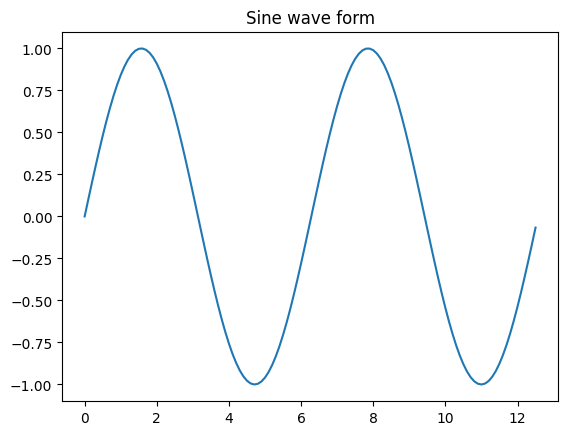

In [25]:
import numpy as np
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 4 * m.pi, 0.1)
y = np.sin(x)

z=sns.lineplot(x=x, y=y)
z.set_title("Sine wave form")

---
### **6.3 Plot cos wave**
---


Text(0.5, 1.0, 'Cos wave form')

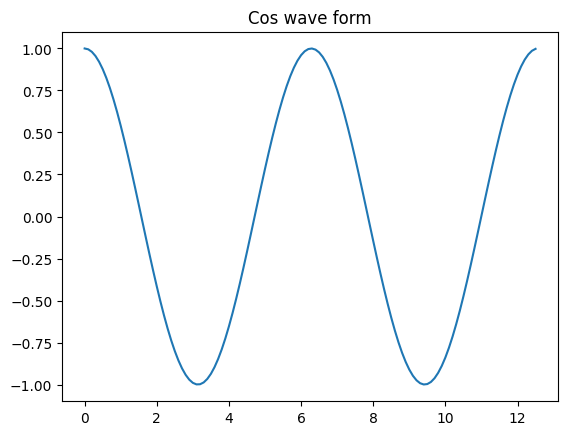

In [26]:
import numpy as np

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 4 * m.pi, 0.1)
y = np.cos(x)

z=sns.lineplot(x=x, y=y)
z.set_title("Cos wave form")

---
# **7 Subplot**
---
### **7.1 Example-1**

Text(0.5, 1.0, 'Sine and Cosine')

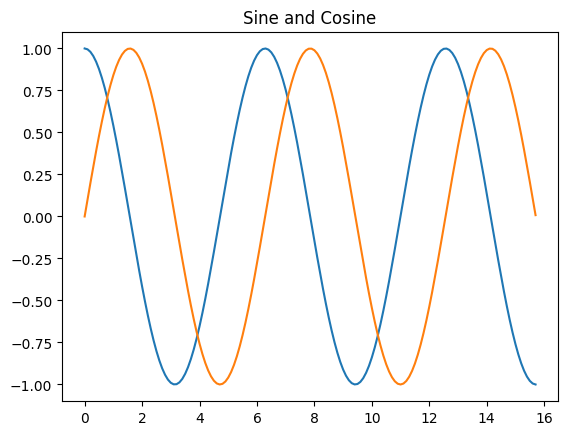

In [27]:
import numpy as np

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 5 * m.pi, 0.1)

y_sin = np.sin(x)
y_cos = np.cos(x)

z=sns.lineplot(x=x, y=y_cos)
z=sns.lineplot(x=x, y=y_sin)
z.set_title('Sine and Cosine')

---
### **7.2 Example-2**
---

Text(0.5, 1.0, 'Cosine')

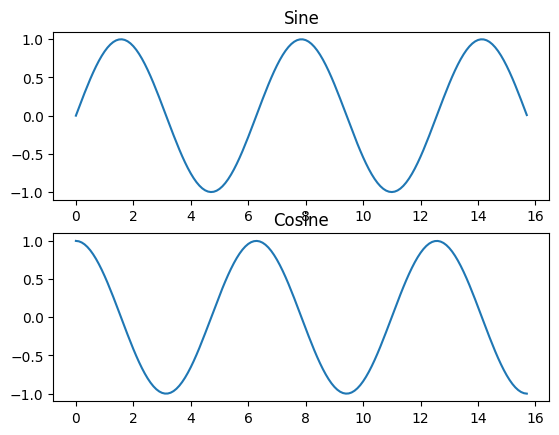

In [28]:
x = np.arange(0, 5 * m.pi, 0.1)

y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1, and
#     set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
z=sns.lineplot(x=x, y=y_sin)
z.set_title('Sine')

# Set the second subplot as active, and make the second plot
plt.subplot(2, 1, 2)
z=sns.lineplot(x=x,y = y_cos)
z.set_title('Cosine')

---
# **8 Box Plot**
---
### **8.1 Data Generation**

In [29]:
import numpy as np

data = [np.random.normal(0, std, 100) for std in range(1, 4)]

data

[array([-0.18487347,  0.72484425,  0.14603545, -0.04807521, -0.59527789,
         0.81905739,  2.11887658,  1.04708491, -0.19082914, -0.81053401,
         0.41705067,  1.16872612,  0.93197146, -0.07188759, -1.2141784 ,
        -1.96123322,  0.01492703, -1.09114732,  0.07876235, -0.15945588,
         1.58262974, -0.36898429, -1.02022041,  0.52250413,  0.53847445,
        -1.25485596, -1.40581724, -0.77718753, -0.6494878 , -0.13586041,
         0.79236055, -0.56691457, -0.73580852, -0.11453627,  1.03549957,
         1.3730844 , -0.26411821,  0.13220672,  1.73362944,  0.30154178,
        -0.29610062, -1.13528369, -1.52995117, -0.76914565,  0.2965686 ,
         0.07872653, -0.83741843,  0.22336116, -0.00413006,  0.0958485 ,
        -0.17913697,  1.01485501, -1.34876489, -0.71961453, -0.43157042,
        -0.97161558, -0.3727345 , -0.10186509,  1.19108098, -1.24014432,
         0.35479808, -0.27487479,  0.37555879, -0.29755915, -0.5679956 ,
         0.58339656, -0.66372329, -0.99828887, -0.2


The code data = [np.random.normal(0, std, 100) for std in range(1, 4)] creates a list of 3 NumPy arrays, each of which contains 100 random numbers drawn from a normal distribution with a mean of 0 and a standard deviation of 1, 2, or 3. The code first creates a range of values from 1 to 3, which will be used as the standard deviations for the normal distributions. Then, it uses a for loop to iterate over the range and generate a NumPy array of 100 random numbers for each standard deviation. Finally, it creates a list of the 3 NumPy arrays.

---
### **8.2 Box Plot - Vertical**
---

<Axes: >

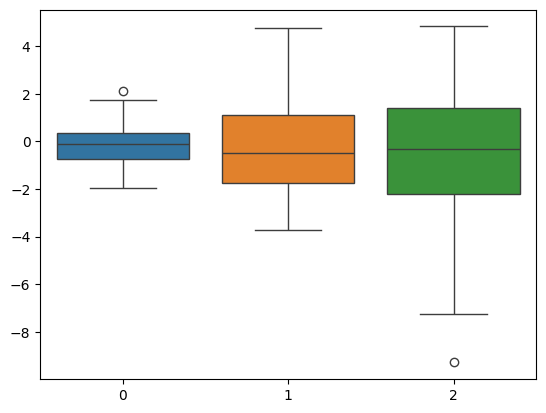

In [30]:
sns.boxplot(data)

---
### **8.3 Box Plot - Horizontal**
---

<Axes: >

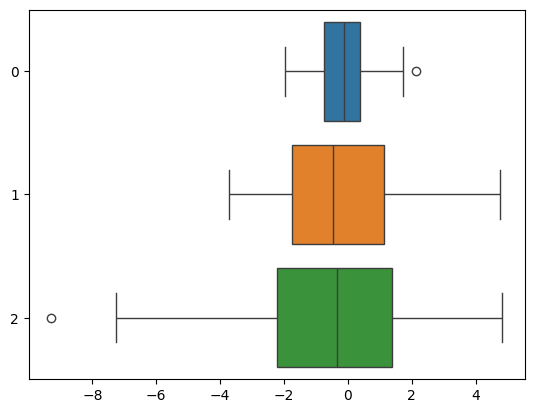

In [31]:
sns.boxplot(data ,orient = 'h')

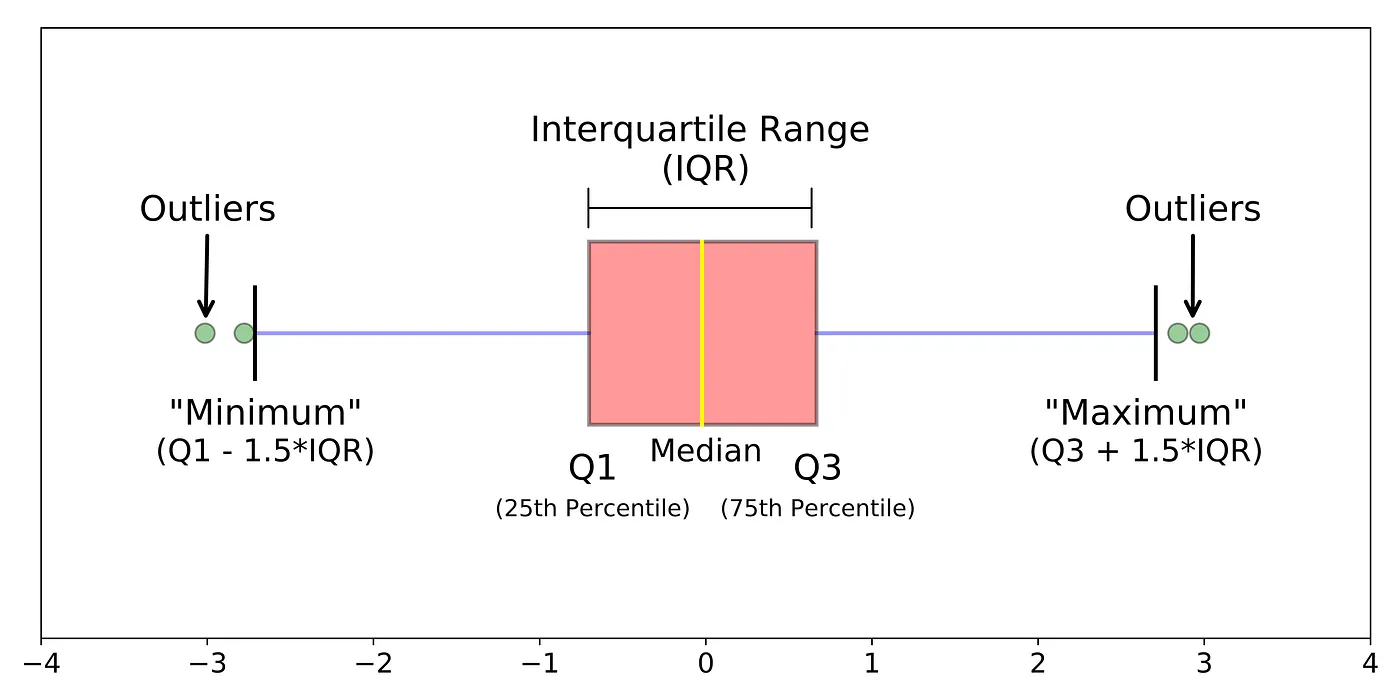

---
# **9 Plot Time Series**
---
### **9.1 Import libraries**

In [32]:
import pandas as pd

---
### **9.2 Download timeSeries Dataset and upload it**

<a href="https://drive.google.com/file/d/1vAhUzlSOIWjNz7dlk6_jmR1VKq-Ui6Id/view?usp=sharing">Click Here</a> to download timeSeries Dataset





### **9.3 Read Time Series Dataset**

In [87]:
series = pd.read_csv('/content/timeSeriesDataset.csv', header=0, index_col=0, parse_dates=True)
series.head(3000)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1989-03-17,12.0
1989-03-18,12.5
1989-03-19,15.0


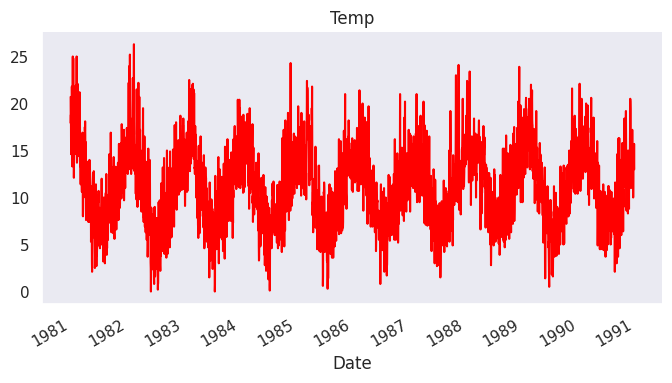

In [86]:
# @title Temp

from matplotlib import pyplot as plt
series['Temp'].plot(kind='line', figsize=(8, 4), title='Temp', color = 'red')
plt.gca().spines[['top', 'right']].set_visible(False)

header=0: This argument specifies that the first row of the CSV file contains the column names. By setting header=0, the function will use the first row as the column headers.

index_col=0: This argument indicates that the first column of the CSV file should be used as the index column of the resulting DataFrame. By setting index_col=0, the function will assign the values of the first column as the row labels in the DataFrame.

parse_dates=True: This argument tells the function to attempt to parse the values in the CSV file as dates. By setting parse_dates=True, pandas will automatically recognize and convert date-like values into proper datetime objects in the DataFrame.

### **9.4 Minimum Daily Temperature Line Plot**

<Axes: xlabel='Date'>

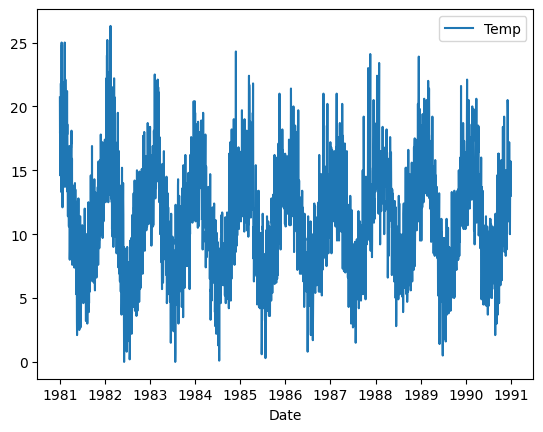

In [34]:
series1 = pd.DataFrame(series)
sns.lineplot(series1)

### **9.5 Minimum Daily Temperature Dot Plot**

<Axes: xlabel='Date'>

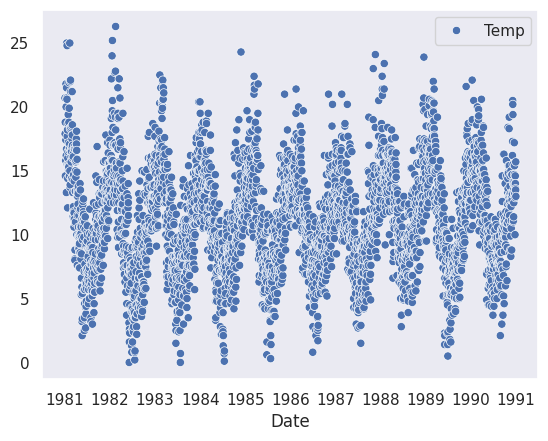

In [89]:
sns.scatterplot(series1, color='purple')

### **9.6 Minimum Daily Temperature Yearly Line Plots**

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

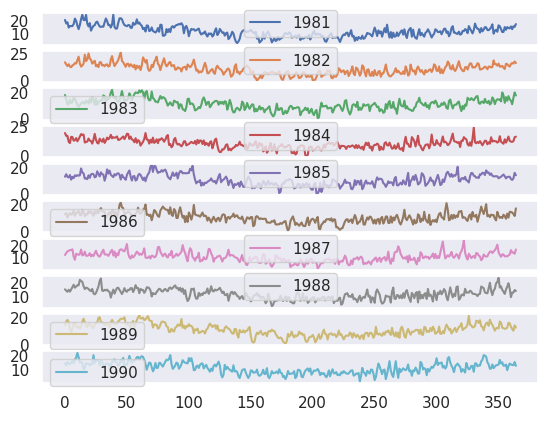

In [97]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values.squeeze() #squeeze() removes single-dimensional entries from the shape of an array.
years.plot(subplots=True, legend=True)

for name, group in groups:: This line starts a loop that iterates over the grouped data. In each iteration, the loop assigns the name of the group (e.g., the specific year) to the name variable and the corresponding data for that group to the group variable.

years[name.year] = group.values: This line adds a new column to the years DataFrame with the column name set as the year extracted from name. The values for this column are set to the values from the current group (group).

### **9.7 Minimum Daily Temperature Histogram Plot**

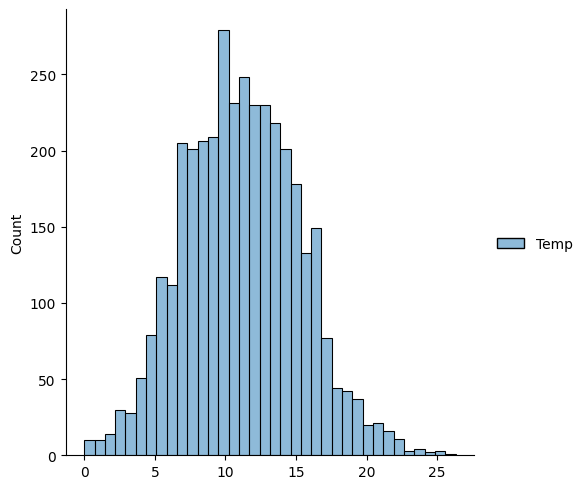

In [37]:
sns.displot(series1)

### **9.8 Minimum Daily Temperature Density Plot**

What is kde?

<Axes: ylabel='Density'>

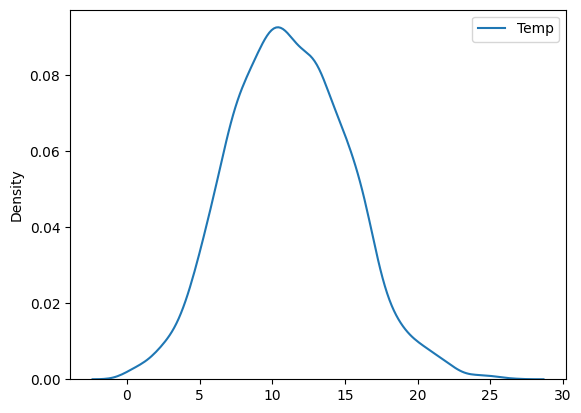

In [38]:
sns.kdeplot(series1)

### **9.9 Minimum Daily Temperature Yearly Box and Whisker Plots**

<ipython-input-39-4186320556>:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(Grouper(freq='A'))


<Axes: >

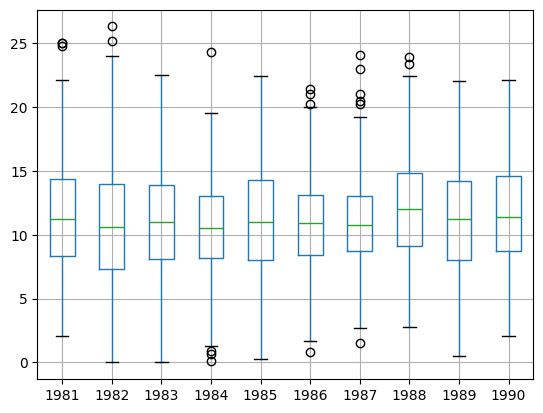

In [39]:
from pandas import DataFrame
from pandas import Grouper
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values.squeeze()
years.boxplot()

### **9.10 Minimum Daily Temperature Yearly Heat Map Plot**

<ipython-input-40-4077562555>:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(Grouper(freq='A'))


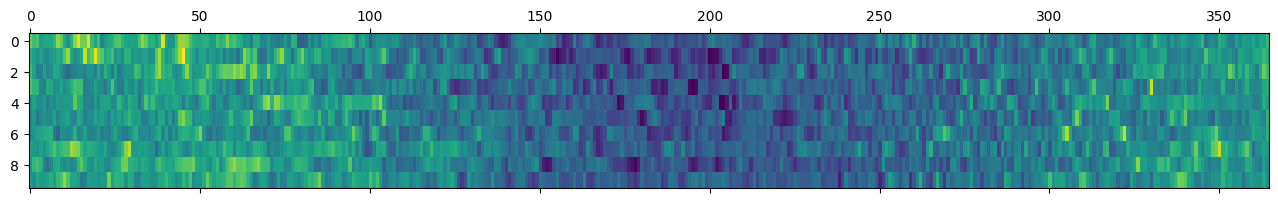

In [40]:
from pandas import Grouper
from matplotlib import pyplot
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values.squeeze()
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')

### **9.11 Minimum Daily Temperature Lag Plot**

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

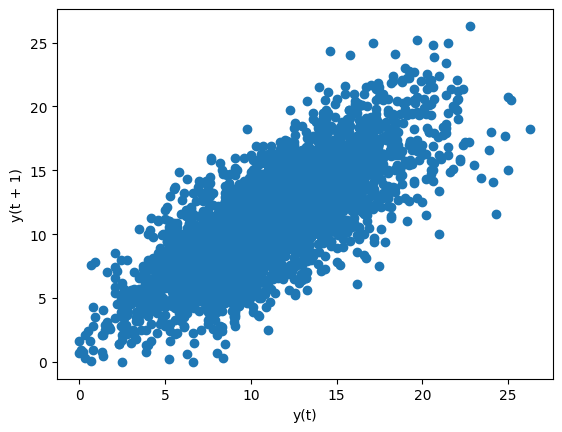

In [41]:
from pandas.plotting import lag_plot
lag_plot(series)

### **9.12 Minimum Daily Temperature Autocorrelation Plot**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

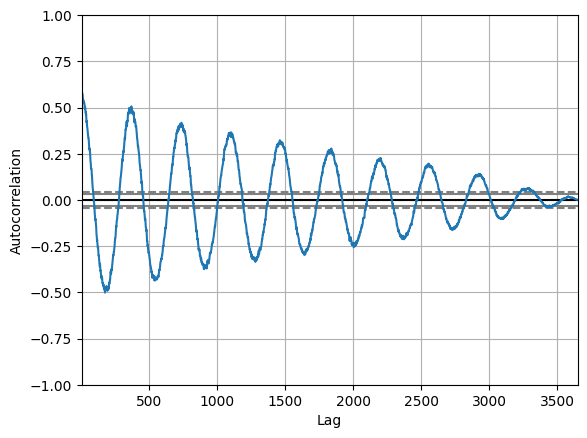

In [42]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)